In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns

# Glass Dataset Exploration (3.1)

In [18]:
glass_cols = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

glass = pd.read_csv('./data/glass.data.txt', names= glass_cols)
glass = glass.set_index('ID')

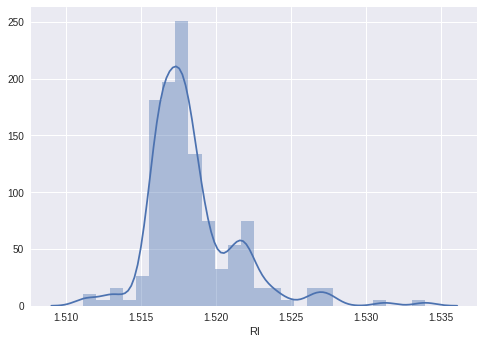

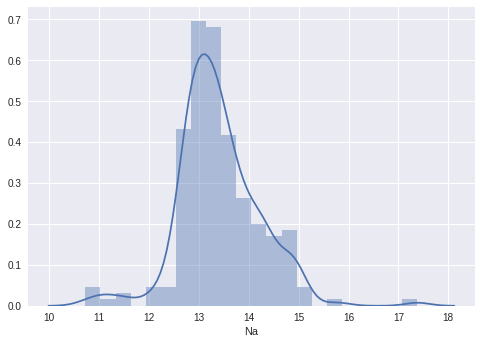

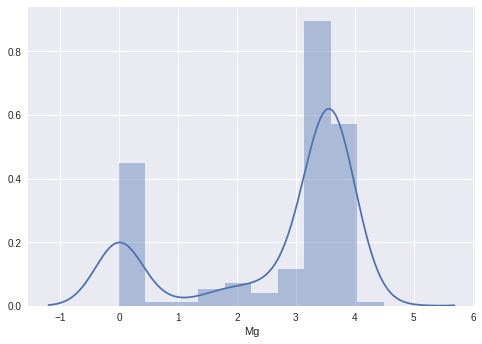

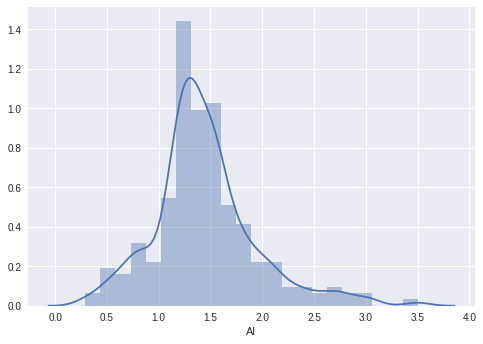

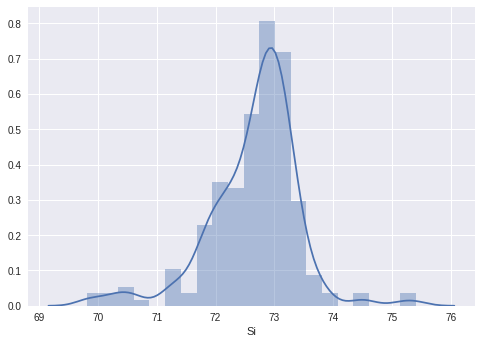

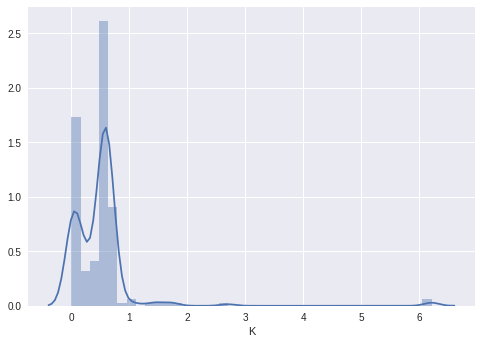

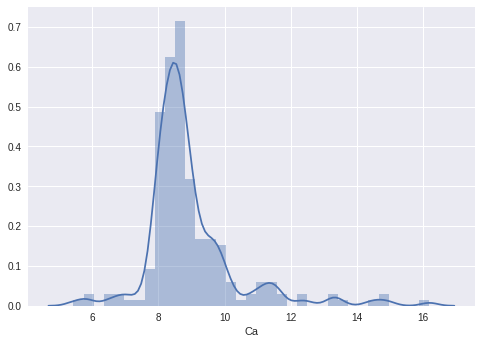

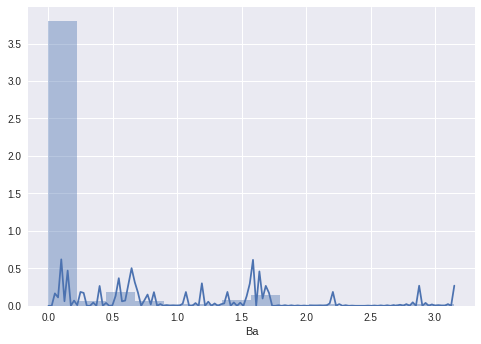

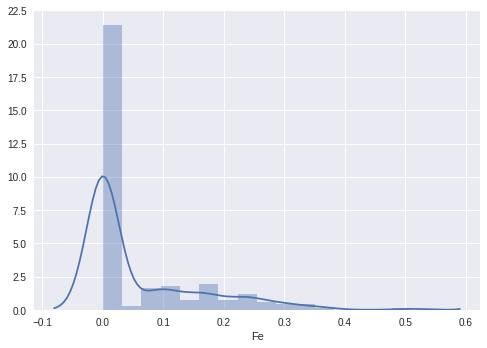

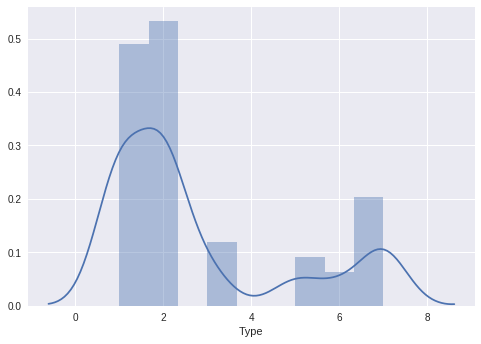

In [19]:
#Create distribution plots of all variables
for col in glass.columns:
    sns.distplot(glass[col])
    plt.show()

In [20]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


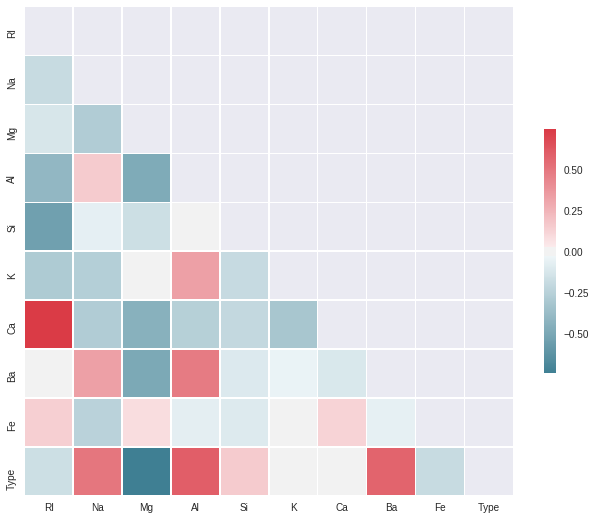

In [25]:
# Compute the correlation matrix
corr = glass.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

From the above Data, distributions for each of the elements in glass can be seen, and their various strengths in predicting the Type can be seen.

In particular, Sodium, Magnesium, Aluminium and Barium seem like good predictors for the glass type.

In [45]:
glass.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

Above are presented the skews within the dataset. Negative values indicate a left skew, while positive values indicate a right skew. In particular, Potassium and Barium are heavily skewed, where Sodium is the least skewed of the predictors.

Outliers do not appear to be present in the data, however, there does appear to be a heavy bias towards types 1 and 2, with very few of class 6 in particular. This can be seen in the Type value_counts data below.

In [35]:
glass.Type.value_counts()

glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

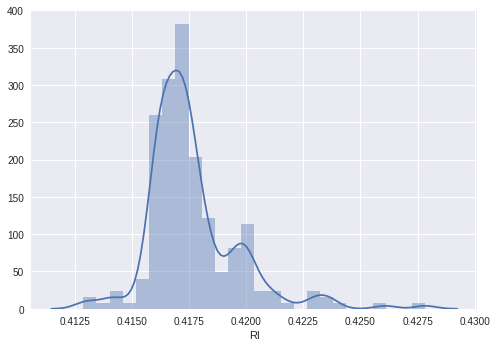

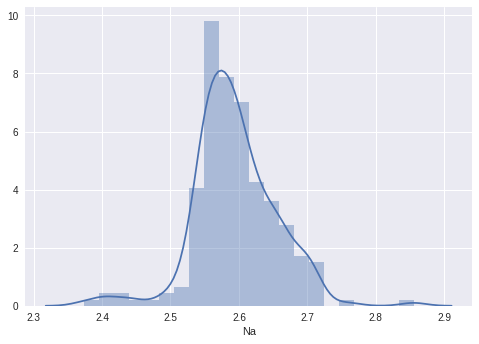

/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


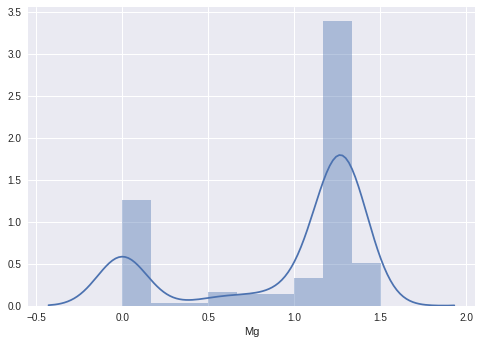

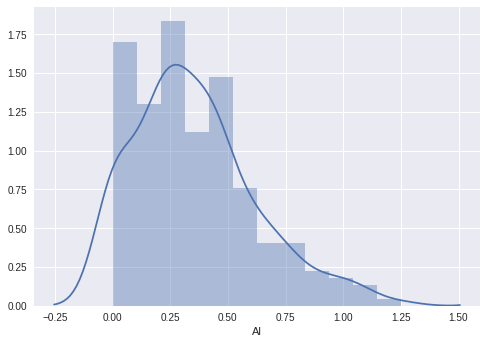

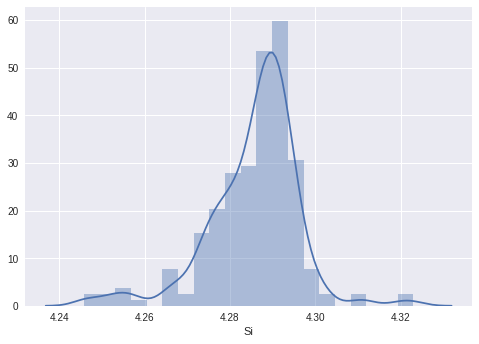

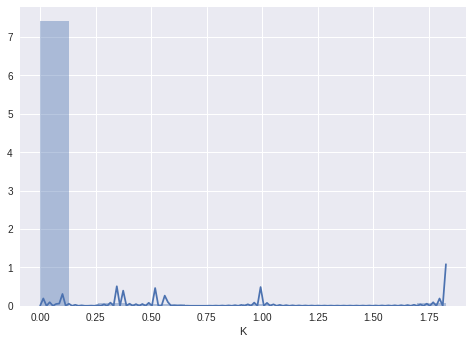

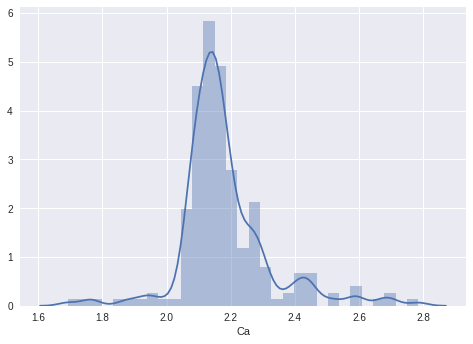

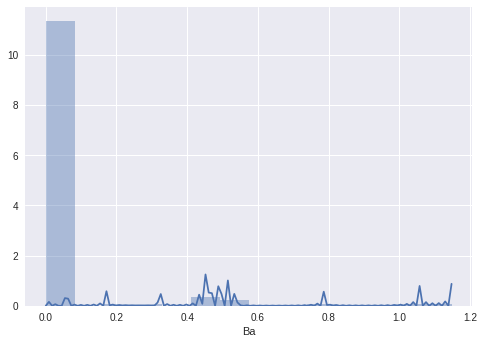

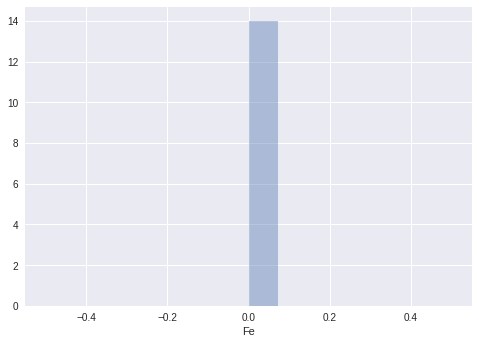

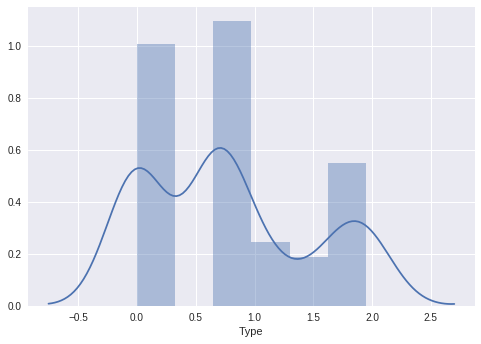

In [46]:
#Create distribution plots of all variables
for col in glass.columns:
    logs = np.log(glass[col])
    logs[logs < 0] = 0
    sns.distplot(logs)
    plt.show()

Applying a log transformation to the data has helped to reduce a lot of the skewness, and normalise the shape.